In [55]:
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [56]:
#the dimensions of the container
W,H = 200,100

In [57]:
class Square:
    def __init__(self, side, id):
        self.side = side
        self.id = id
        self.x = None
        self.y = None
        self.placed = False

    def area(self):
        return self.side * self.side


In [58]:
def generate_squares(n, min_size=10, max_size=20):
    squares = [Square(random.randint(min_size, max_size), f"S{i+1}") for i in range(n)]
    squares.sort(key=lambda s: s.side, reverse=True)
    return squares

This is to check whether a new square placed at position (x,y) overlaps an already placed square.

Note that to overlap, the bottom leftmost coordinates of the new square should be inside the placed square.

In [59]:
def does_overlap(new_square, placed_squares, x, y):
    for sq in placed_squares:
        if (x < sq.x + sq.side and x + new_square.side > sq.x and
            y < sq.y + sq.side and y + new_square.side > sq.y):
            return True
    return False


The heuristic used when placing the squares is bottom-left corner. This method places the largest boxes first. The location/coordinates of boxes are chosen by prioritizing the bottom-left coordinates of the container.

Squares are placed only if the squares don't exceed the dimensions of the container and don't overlap already placed squares.

Once a square is placed new candidate positions are obtained by choosing the top or right coordinates of the placed square.

In [60]:
def place_squares(squares):
    placed = []
    candidate_positions = [(0, 0)]  # bottom-left corner

    for square in squares:
        for cx, cy in sorted(candidate_positions, key=lambda p: (p[1], p[0])):  # Bottom-left first
            if (cx + square.side <= W and cy + square.side <= H and
                not does_overlap(square, placed, cx, cy)):
                square.x, square.y = cx, cy
                square.placed = True
                placed.append(square)

                # Add new candidate positions from this square's top and right
                candidate_positions.append((cx + square.side, cy))  # right
                candidate_positions.append((cx, cy + square.side))  # top
                break
    return placed

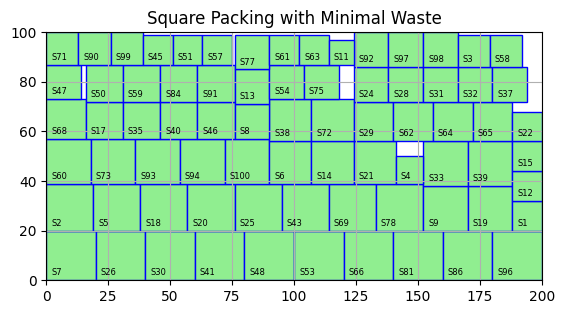

Total wasted area:  565


In [63]:
def visualize_packing(squares):
    fig, ax = plt.subplots()
    ax.set_xlim(0, W)
    ax.set_ylim(0, H)
    ax.set_title("Square Packing with Minimal Waste")
    for sq in squares:
        if sq.placed:
            rect = patches.Rectangle((sq.x, sq.y), sq.side, sq.side,
                                     linewidth=1, edgecolor='blue', facecolor='lightgreen')
            ax.add_patch(rect)
            ax.text(sq.x + 2, sq.y + 2, sq.id, fontsize=6)
    ax.set_aspect('equal')
    plt.grid(True)
    plt.show()

def calculate_wasted_area(squares):
    used_area = sum(sq.area() for sq in squares if sq.placed)
    total_area = W * H
    return total_area - used_area


squares = generate_squares(n=100)
placed_squares = place_squares(squares)
visualize_packing(placed_squares)
wasted = calculate_wasted_area(placed_squares)
print("Total wasted area: ", wasted)